# Chapter08 이미지를 위한 인공 신경망

### 08-1 합성곱 신경망의 구성 요소

**합성곱** (convolution) :

입력 데이터 전체에 가중치를 적용하는 것이 아닌 일부에 가중치를 곱함

합성곱 신경망 ( CNN ) 에서는 뉴런을 '*필터 or 커널* ' 이라고 부름

- 커널 : 입력에 곱하는 가중치를 표현

- 필터 : 뉴런 개수를 표현 (도장)

- 특성 맵 : 합성곱 계산을 통해 얻은 출력

---

합성곱 층에서도 여러 개의 필터를 사용한다. --> 특성 맵이 3차원이 된다.

각 필터마다 가중치가 다르며, 편향이 존재한다. ( 편향은 모두 같음??????? )

In [1]:
# 케라스 합성곱 층
# (왼쪽에서 오른쪽으로, 위에서 아래로) 이동하는 합성곱 : Conv2D 클래스
from tensorflow import keras
keras.layers.Conv2D(10, kernel_size=(3,3), activation='relu')  # 필터개수, 커널크기, 활성화함수 지정

# 활성화 함수는 ReLU함수가 많이 쓰인다

패딩과 스트라이트

- **패딩** : 입력 배열의 주위를 가상의 원소로 채우는 것 ( 출력의 크기를 늘리기 위해 쓰임 )

 - 세임 패딩 : 입력과 특성 맵의 크기를 동일하게 만들기 위해 입력 주위에 0으로 패딩하는 것 ( 입력크기 == 특성 맵 크기 )

 - 밸리드 패딩 : 패딩 없이 순수한 입력 배열에서만 합성곱을 하여 특성 맵을 만드는 경우

적절한 패딩은 이미지의 주변(테두리)에 있는 정보를 잃어버리지 않도록 도와준다.

In [2]:
keras.layers.Conv2D(10, kernel_size=(3,3), activation='relu', padding='same')   # padding의 기본값은 valid

- **스트라이드** : 이동하는 크기 ( 기본값: 1 ) , 즉 기본값으로는 한칸씩 이동함

In [ ]:
keras.layers.Conv2D(10, kernel_size=(3,3), activation='relu', padding='same', strides=1)
# strides=(m,n) 으로 지정하면 오른쪽으로 이동할 때는 m만큼, 아래로 이동할 때는 n만큼 이동 (잘 안씀)

- **풀링** : 특성 맵의 가로세로 크기를 줄이는 역할을 수행

 특성 맵에 커널 없는 필터를 적용하는 것과 비슷하다.

 - 최대 풀링 : 특성 맵에서 가장 큰 값을 고름

 - 평균 풀링 : 특성 맵에서 평균값을 계산함

풀링에서는 합성곱과 달리 겹치는 부분 없이 이동을 한다. --> 풀링 크기와 스트라이드 크기가 같다.

ex) 풀링의 크기가 (2,2)라면 2칸씩 이동, (3,3)라면 3칸씩 이동

대부분 평균풀링보다 최대풀링을 더 많이 사용한다.

In [3]:
# 케라스에서의 풀링
keras.layers.MaxPooling2D(2)      # 최대 풀링
keras.layers.AveragePooling2D(2)  # 평균 풀링
# 풀링크기를 지정해주어야 함

In [8]:
keras.layers.MaxPooling2D(2, strides=2, padding='valid')   # strides의 기본값은 자동으로 풀링의 크기이므로 지정할 필요X,
#                                                            padding도 기본으로 valid이므로 지정할 필요X

풀링을 사용하는 이유 : 

스트라이드를 크게 하여 특성 맵을 줄이는 것보다 풀링으로 줄이는 것이 경험적으로 더 나은 성능을 내기 때문

---

컬러 이미지를 사용한 합성곱

컬러 이미지는 RGB로 구성되어 있기 때문에, 3차원 배열로 표시한다,

--> 필터의 커널 크기가 (3,3)이 아니라 (3,3,3)이 되어야 한다.

흑백 이미지일 경우에도 깊이차원이 1인 3차원 배열로 변환하여 전달한다. (28,28) --> (28,28,1) 이렇게

---

- 합성곱 신경망은 너비와 높이는 점점 줄어들고 깊이는 점점 깊어지는 것이 특징이다.

- 마지막에 출력층 전에 특성 맵을 모두 펼쳐서 (1차원으로 만들어) 밀집층의 입력으로 사용한다.

### 08-2 합성곱 신경망을 사용한 이미지 분류

In [13]:
# 패션 MNIST 데이터 불러오기
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0   # Conv2D층을 사용하기 위해 채널 차원 추가
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [14]:
print(train_scaled.shape, train_target.shape)

(48000, 28, 28, 1) (48000,)


In [15]:
model = keras.Sequential()

# 첫 번째 합성곱 층 추가
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu',
                              padding='same', input_shape=(28,28,1)))

# 이 합성곱 층은 32개의 필터를 사용하며, 커널의 크기는 (3,3), ReLU함수와 세임패딩을 사용한다

In [16]:
model.add(keras.layers.MaxPooling2D(2))  # 풀링 층 추가, 풀링크기: (2,2)

# (2,2)의 풀링을 적용했으므로, 특성 맵 크기는 절반으로 줄어든다

In [17]:
# 두 번째 합성곱-풀링 층 추가
model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu', 
                              padding='same'))  # 필터개수 64개로 늘림
model.add(keras.layers.MaxPooling2D(2))

In [18]:
model.add(keras.layers.Flatten())  # 특성 맵을 1차원으로 펼침
model.add(keras.layers.Dense(100, activation='relu'))   # 은닉층 추가
model.add(keras.layers.Dropout(0.4))                    # 드롭아웃 적용
model.add(keras.layers.Dense(10, activation='softmax')) # 최종 출력층

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               313700    
_________________________________________________________________
dropout (Dropout)            (None, 100)               0

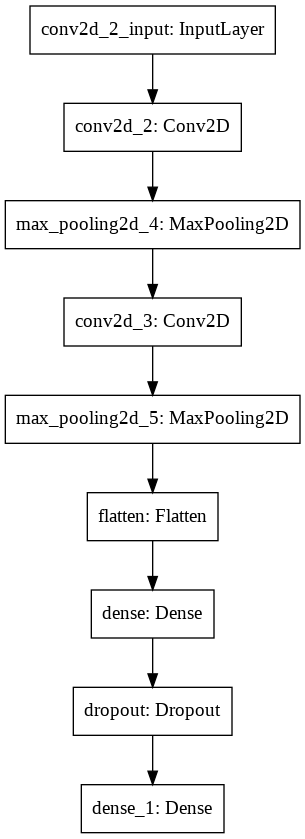

In [28]:
keras.utils.plot_model(model)   # 층의 구성을 그림으로 표현해주는 함수

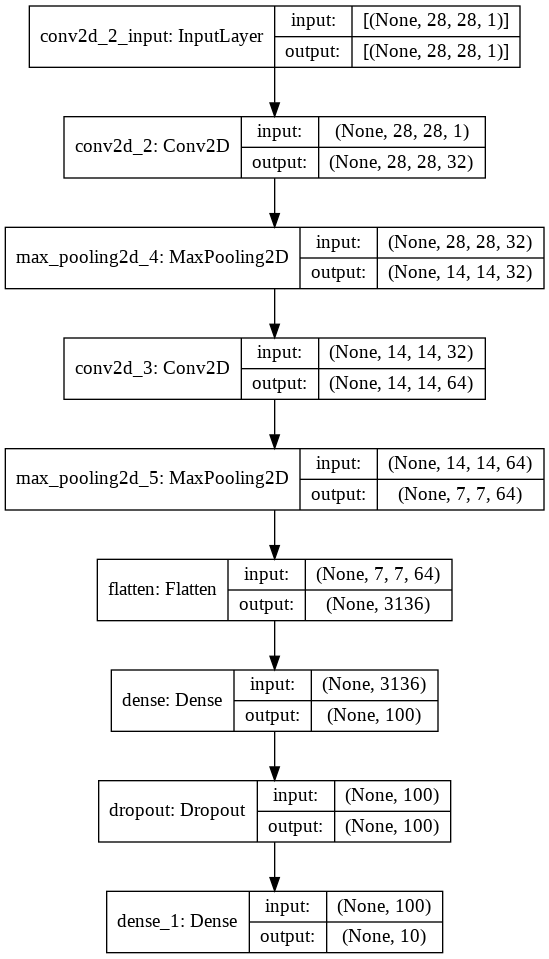

In [29]:
keras.utils.plot_model(model, show_shapes=True,                 # show_shapes=True: 입력과 출력의 크기를 표시해줌
                       to_file='cnn-architecture.png', dpi=96)  # to_file: 출력한 이미지를 파일로 저장, dpi: 해상도 지정